<a href="https://colab.research.google.com/github/nath-lab/Datawarehouse_GCW/blob/main/DWH(Group_New_Tasks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/bank_transactions.csv'
df = pd.read_csv(file_path)
df.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
# Check the first rows
df.head()

# Check columns
df.info()
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y')
snapshot_date = df['TransactionDate'].max() + pd.Timedelta(days=1)
print("Snapshot Date:", snapshot_date)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB
Snapshot Date: 2016-10-22 00:00:00


In [ ]:
# Recency
recency = df.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency['Recency'] = (snapshot_date - recency['TransactionDate']).dt.days

# Frequency
frequency = df.groupby('CustomerID')['TransactionID'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Monetary
monetary = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

# Combine all
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm.head()


,CustomerID,TransactionDate,Recency,Frequency,Monetary
0,C1010011,2016-09-26,26,2,5106.0
1,C1010012,2016-08-14,69,1,1499.0
2,C1010014,2016-08-07,76,2,1455.0
3,C1010018,2016-09-15,37,1,30.0
4,C1010024,2016-08-18,65,1,5000.0


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Log transform
rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

Mounted at /content/drive
Found file at: /content/drive/MyDrive/bank_transactions.csv
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   176

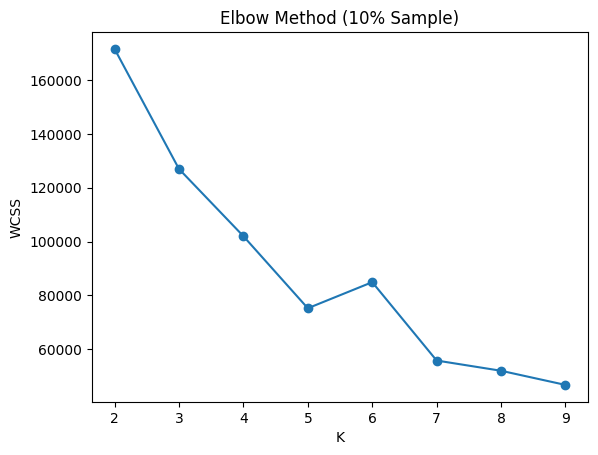

Silhouette Score for k=3: 0.348
Silhouette Score for k=4: 0.364
Silhouette Score for k=5: 0.372


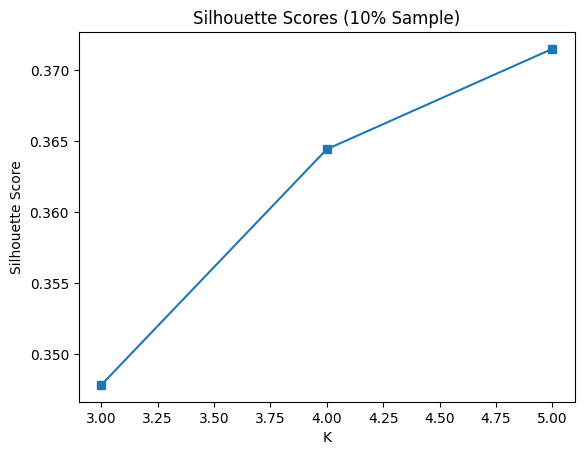

           Recency  Frequency     Monetary
Cluster                                   
0        57.388620   1.000496   116.499556
1        40.307961   1.004863  2537.168213
2        48.895806   2.145101  3372.908513
3        68.601247   1.000000  2217.825947


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- 1) Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- 2) Try to read file from Drive ---
import pandas as pd
import os

# Update this path after you check it in the Colab file browser
file_path = '/content/drive/MyDrive/bank_transactions.csv'

if os.path.exists(file_path):
    print(f"Found file at: {file_path}")
    df = pd.read_csv(file_path)
else:
    print("File not found! Please upload manually.")
    from google.colab import files
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df = pd.read_csv(file_name)

# --- 3) Preview data ---
print(df.head())

# --- 4) Prepare snapshot date ---
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y')
snapshot_date = df['TransactionDate'].max() + pd.Timedelta(days=1)
print("Snapshot Date:", snapshot_date)

# --- 5) Build RFM ---
recency = df.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency['Recency'] = (snapshot_date - recency['TransactionDate']).dt.days

frequency = df.groupby('CustomerID')['TransactionID'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

monetary = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
print(rfm.head())

# --- 6) Transform & scale ---
from sklearn.preprocessing import StandardScaler
import numpy as np

rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# --- 7) Elbow & Silhouette on 10% sample ---
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)
sample_idx = np.random.choice(len(rfm_scaled), size=int(len(rfm_scaled)*0.1), replace=False)
rfm_sample = rfm_scaled[sample_idx]

wcss = []
for k in range(2, 10):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=1, batch_size=10000)
    kmeans.fit(rfm_sample)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method (10% Sample)')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

silhouette_scores = []
for k in [3, 4, 5]:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=1, batch_size=10000)
    labels = kmeans.fit_predict(rfm_sample)
    score = silhouette_score(rfm_sample, labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score:.3f}')

plt.plot([3,4,5], silhouette_scores, marker='s')
plt.title('Silhouette Scores (10% Sample)')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

# --- 8) Final KMeans on full data ---
final_k = 4  # adjust based on plots
kmeans_full = MiniBatchKMeans(n_clusters=final_k, random_state=1, batch_size=10000)
rfm['Cluster'] = kmeans_full.fit_predict(rfm_scaled)
# === 6) View cluster means ===
print(
    rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
)


# --- 9) Save results ---
rfm.to_csv('rfm_clustered_customers.csv', index=False)
from google.colab import files
files.download('rfm_clustered_customers.csv')


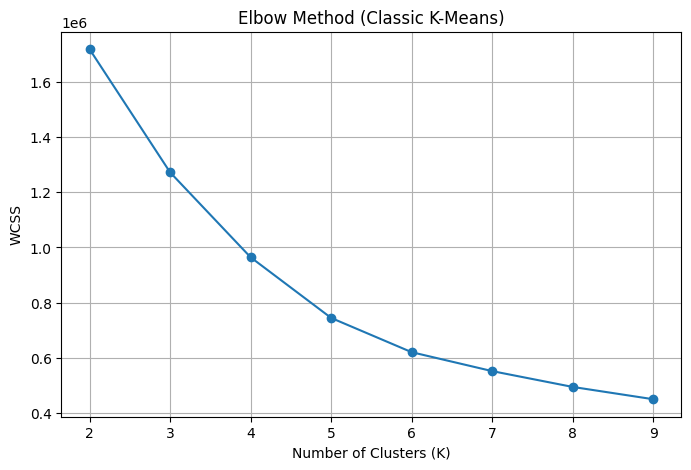

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- If you haven't yet: scale the RFM ---
rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# --- Classic Elbow using full data and KMeans ---
wcss = []  # Within-cluster sum of squares

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method (Classic K-Means)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()


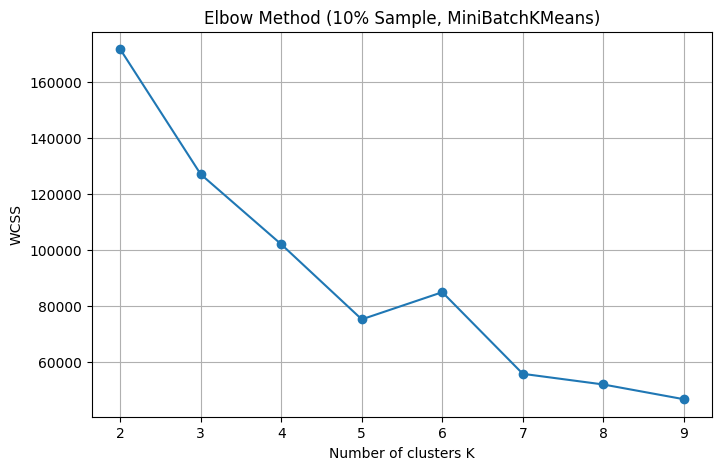

Silhouette Score for k=3: 0.348
Silhouette Score for k=4: 0.364
Silhouette Score for k=5: 0.372


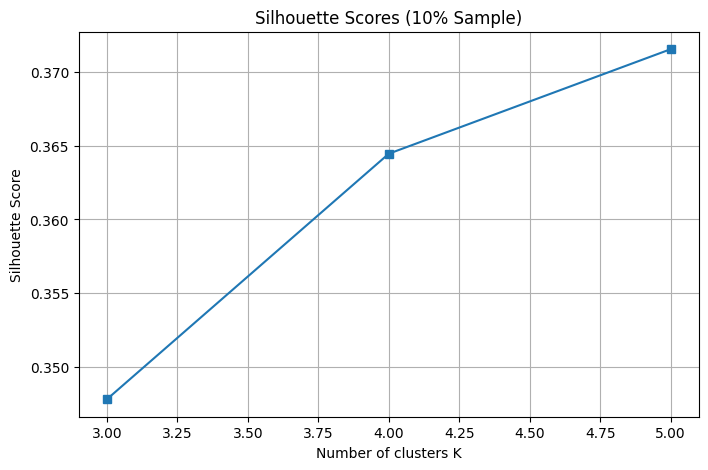

Cluster Profile:


,Recency,Frequency,Monetary,CustomerID
Cluster,,,,
0,61.6,1.0,86.2,180225
1,53.4,1.0,6497.4,129580
2,48.9,2.1,3373.6,142562
3,68.9,1.0,846.1,266529
4,38.9,1.0,525.3,165369


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# === 1) Log transform & scale ===
import numpy as np
rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# === 2) Take a 10% random sample ===
np.random.seed(42)
sample_idx = np.random.choice(len(rfm_scaled), size=int(len(rfm_scaled)*0.1), replace=False)
rfm_sample = rfm_scaled[sample_idx]

# === 3) Elbow with MiniBatchKMeans ===
wcss = []
for k in range(2, 10):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=1, batch_size=10000)
    kmeans.fit(rfm_sample)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method (10% Sample, MiniBatchKMeans)')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# === 4) Silhouette for selected K only ===
silhouette_scores = []
for k in [3,4,5]:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=1, batch_size=10000)
    labels = kmeans.fit_predict(rfm_sample)
    score = silhouette_score(rfm_sample, labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score:.3f}')

plt.figure(figsize=(8,5))
plt.plot([3,4,5], silhouette_scores, marker='s')
plt.title('Silhouette Scores (10% Sample)')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# === 5) Final KMeans on full data ===
final_k = 4
kmeans_full = MiniBatchKMeans(n_clusters=final_k, random_state=1, batch_size=10000)
kmeans.fit(rfm_scaled)
#rfm['Cluster'] = kmeans_full.fit_predict(rfm_scaled)

# Assign cluster labels to RFM data
rfm['Cluster'] = kmeans.labels_

# Profile clusters: mean RFM and customer count
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).round(1)

print("Cluster Profile:")
display(cluster_profile)


# # === 6) View cluster means ===
# print(
#     rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
# )



In [ ]:
rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

print("Log-transformed RFM:")
print(rfm_log.head())

print("\nStandardised RFM (first 5 rows):")
print(rfm_scaled[:5])


Log-transformed RFM:
    Recency  Frequency  Monetary
0  3.295837   1.098612  8.538367
1  4.248495   0.693147  7.313220
2  4.343805   1.098612  7.283448
3  3.637586   0.693147  3.433987
4  4.189655   0.693147  8.517393

Standardised RFM (first 5 rows):
[[-2.01841648  1.95734464  1.41865034]
 [ 0.70383871 -0.42565518  0.65873037]
 [ 0.97619094  1.95734464  0.64026364]
 [-1.04185572 -0.42565518 -1.74743533]
 [ 0.53569989 -0.42565518  1.40564067]]


In [ ]:
# ---------------------------
# 📌 6. Cross-tab: Cluster vs Top 5 Locations
# ---------------------------
top_locations = df['CustLocation'].value_counts().nlargest(5).index
merged = df.merge(rfm[['CustomerID', 'Cluster']], on='CustomerID')
ct = pd.crosstab(merged['CustLocation'], merged['Cluster'])
print(ct.loc[top_locations])

# ---------------------------
# 📌 7. Save clustered RFM
# ---------------------------
rfm.to_csv('rfm_clustered_customers.csv', index=False)
from google.colab import files
files.download('rfm_clustered_customers.csv')

# NOTE: For Star Schema diagram, use draw.io, Lucidchart or hand-draw:
# FACT TABLE: Customer_Transactions (FKs to Customer_Dim, Time_Dim, Location_Dim, Cluster_Dim)

Cluster           0      1      2      3
CustLocation                            
MUMBAI        19867  20198  30327  33203
NEW DELHI     17649  15518  25054  26707
BANGALORE     18436  14622  23839  24658
GURGAON       16932  13608  21216  22062
DELHI         17123  12739  20807  20350


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

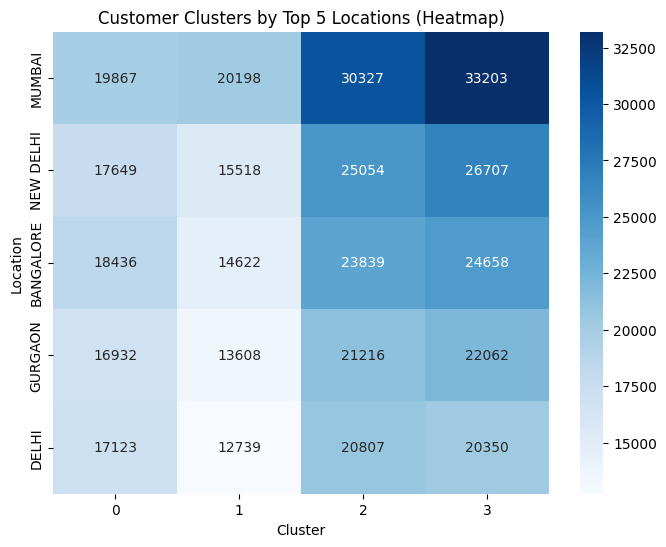

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure your cross-tab is limited to top 5 locations:
ct_top5 = ct.loc[top_locations]

plt.figure(figsize=(8, 6))
sns.heatmap(ct_top5, annot=True, fmt='d', cmap='Blues')
plt.title('Customer Clusters by Top 5 Locations (Heatmap)')
plt.xlabel('Cluster')
plt.ylabel('Location')
plt.show()


In [ ]:
# ---------------------------
# Generate RFM scores
# ---------------------------

# Recency: lower is better, so inverse
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

# Create quantile-based R/F/M scores
r_quartiles = pd.qcut(rfm['Recency'], 5, labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=f_labels)
m_quartiles = pd.qcut(rfm['Monetary'], 5, labels=m_labels)

rfm['R_Score'] = r_quartiles.astype(str)
rfm['F_Score'] = f_quartiles.astype(str)
rfm['M_Score'] = m_quartiles.astype(str)

# Combine into RFM_Segment code like '555'
rfm['RFM_Segment'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

print(rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Segment']].head())


   Recency  Frequency  Monetary RFM_Segment
0       26          2    5106.0         555
1       69          1    1499.0         214
2       76          2    1455.0         154
3       37          1      30.0         511
4       65          1    5000.0         215


 Segment counts:
Segment
Potential Loyalists    691403
Loyal Customers         98376
Top Customers           41825
At Risk                 33193
Churned                 19468
Name: count, dtype: int64

 Churned counts:
Churned
0    864797
1     19468
Name: count, dtype: int64


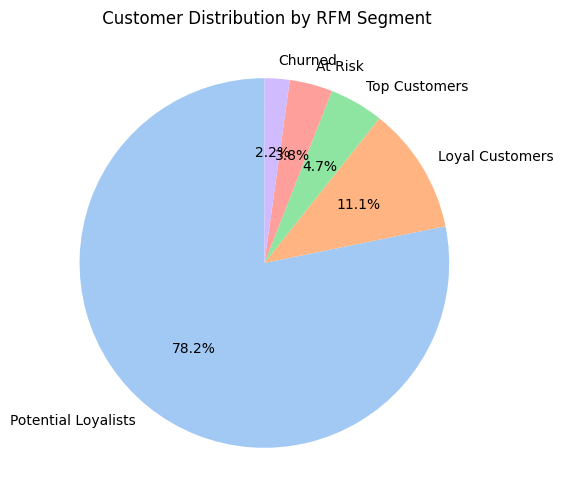

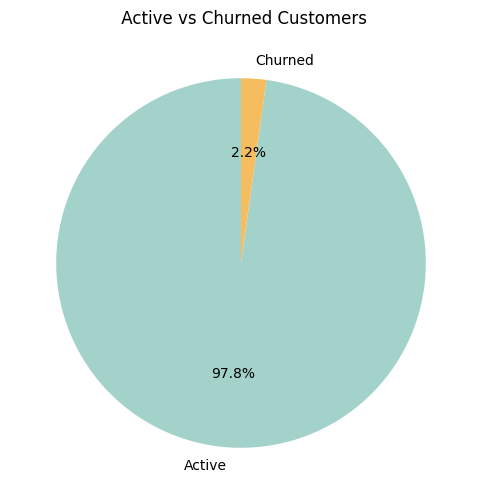

In [ ]:
# ---------------------------
#  Define Customer Segments from RFM_Segment
# ---------------------------
def get_segment(score):
    if score in ['555', '554', '545']:
        return 'Top Customers'
    elif score[1:] in ['54', '53', '44']:
        return 'Loyal Customers'
    elif score.startswith('5') and score.endswith('1'):
        return 'At Risk'
    elif score in ['111', '123', '155']:
        return 'Churned'
    else:
        return 'Potential Loyalists'

rfm['Segment'] = rfm['RFM_Segment'].apply(get_segment)

print(" Segment counts:")
print(rfm['Segment'].value_counts())

# ---------------------------
#  Add Churned flag
# ---------------------------
rfm['Churned'] = rfm['Segment'].apply(lambda x: 1 if x == 'Churned' else 0)

print("\n Churned counts:")
print(rfm['Churned'].value_counts())

# ---------------------------
# Pie Chart: Customer Segments
# ---------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
rfm['Segment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title(" Customer Distribution by RFM Segment")
plt.ylabel("")
plt.show()

# ---------------------------
#  Pie Chart: Active vs. Churned
# ---------------------------
plt.figure(figsize=(6, 6))
rfm['Churned'].map({0: 'Active', 1: 'Churned'}).value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#a3d2ca', '#f6bd60']
)
plt.title(" Active vs Churned Customers")
plt.ylabel("")
plt.show()


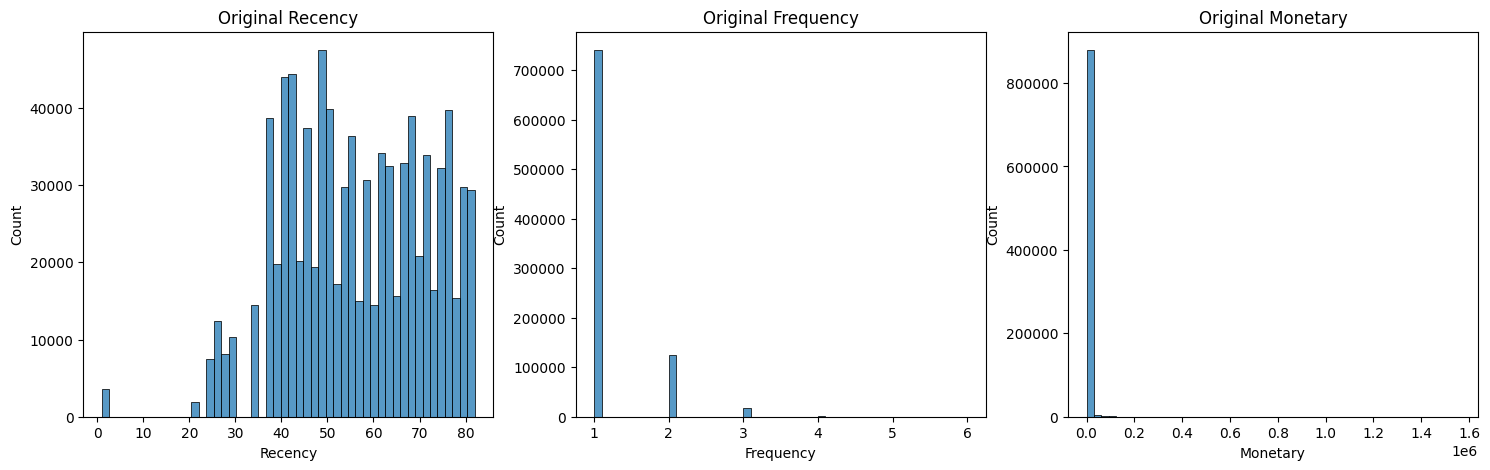

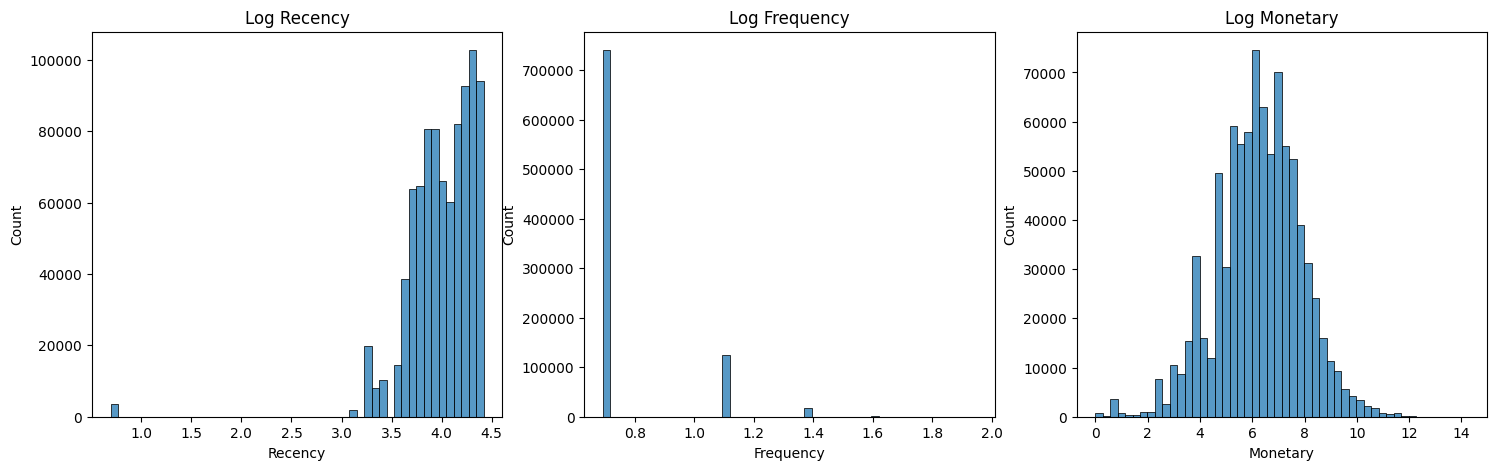

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Original
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], bins=50, ax=axs[0]).set_title('Original Recency')
sns.histplot(rfm['Frequency'], bins=50, ax=axs[1]).set_title('Original Frequency')
sns.histplot(rfm['Monetary'], bins=50, ax=axs[2]).set_title('Original Monetary')
plt.show()

# Log transformed
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm_log['Recency'], bins=50, ax=axs[0]).set_title('Log Recency')
sns.histplot(rfm_log['Frequency'], bins=50, ax=axs[1]).set_title('Log Frequency')
sns.histplot(rfm_log['Monetary'], bins=50, ax=axs[2]).set_title('Log Monetary')
plt.show()


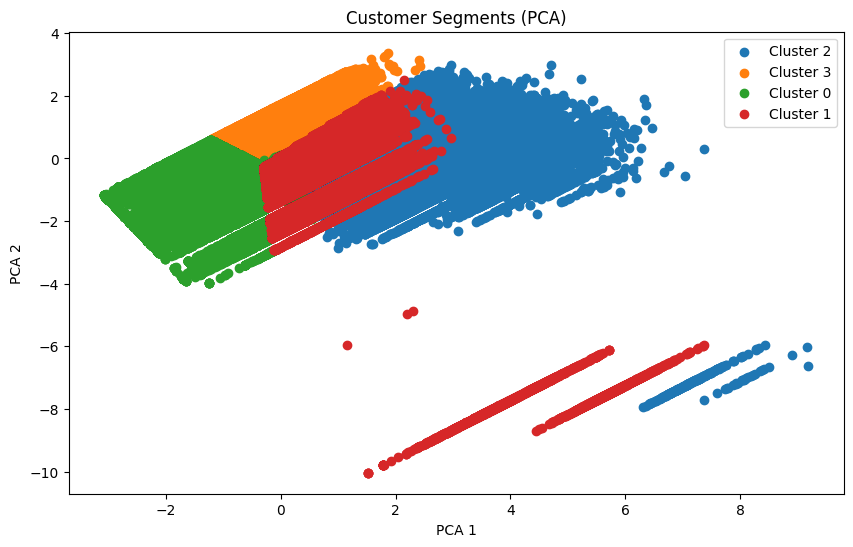

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = components[:,0]
rfm['PCA2'] = components[:,1]

plt.figure(figsize=(10,6))
for c in rfm['Cluster'].unique():
    cluster_data = rfm[rfm['Cluster'] == c]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {c}')
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


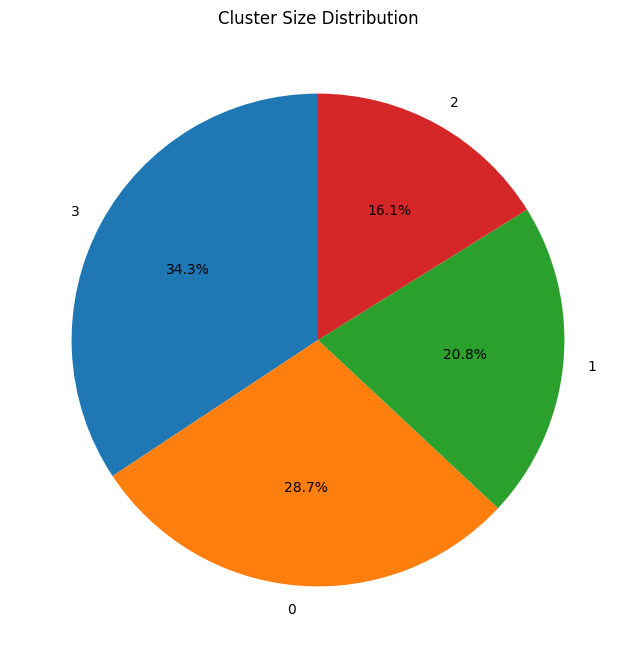

In [ ]:
rfm['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), startangle=90)
plt.title('Cluster Size Distribution')
plt.ylabel('')
plt.show()


In [ ]:
import pandas as pd

# Make a dummy product holding dataset
dummy_products = {
    'CustomerID': rfm['CustomerID'].head(20),  # just take first 20 for demo
    'ProductA': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1],
    'ProductB': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    'ProductC': [1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]
}

dummy_df = pd.DataFrame(dummy_products)

# Save it to Drive so your next cell can read it
dummy_df.to_csv('/content/drive/MyDrive/product_holdings.csv', index=False)

print(dummy_df.head())


  CustomerID  ProductA  ProductB  ProductC
0   C1010011         1         0         1
1   C1010012         0         1         1
2   C1010014         1         0         0
3   C1010018         0         1         0
4   C1010024         1         1         1


In [ ]:
import pandas as pd

# Make dummy e-statement preference data for your customers
dummy_prefs = {
    'CustomerID': rfm['CustomerID'].head(20),  # just a sample
    'Prefers_EStatement': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
}

prefs_df = pd.DataFrame(dummy_prefs)

# Save it so your real block can read it:
prefs_df.to_csv('/content/drive/MyDrive/statement_prefs.csv', index=False)

print(prefs_df.head())


  CustomerID  Prefers_EStatement
0   C1010011                   1
1   C1010012                   0
2   C1010014                   1
3   C1010018                   1
4   C1010024                   0


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-08-02           143207   
1             2270.69      2016-08-02           141858   
2            17874.44      2016-08-02           142712   
3           866503.21      2016-08-02           142714   
4             6714.43      2016-08-02           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3        

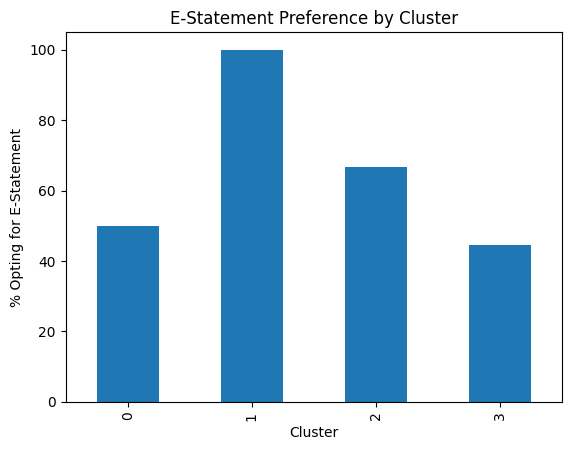

In [ ]:
# FINAL ADVANCED ANALYTICS NOTEBOOK

# ---------------------------
# 1) Mount Drive + Load Data
# ---------------------------
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Update paths!

rfm = pd.read_csv('/content/drive/MyDrive/rfm_clustered_customers.csv')
print(rfm.head())

# ---------------------------
# 2) Lifetime Value (LTV) Modelling
# ---------------------------

ltv_data = df.groupby(['CustomerID', df['TransactionDate'].dt.year])['TransactionAmount (INR)'].sum().reset_index()
ltv_pivot = ltv_data.pivot(index='CustomerID', columns='TransactionDate', values='TransactionAmount (INR)').fillna(0)
ltv_pivot = ltv_pivot.merge(rfm[['CustomerID', 'Cluster']], on='CustomerID')

years = [col for col in ltv_pivot.columns if isinstance(col, int)]
latest_year = max(years)

# Reset index to expose CustomerID as column
X = ltv_pivot.drop([latest_year], axis=1).reset_index()
X = X.drop(['CustomerID'], axis=1)
y = ltv_pivot[latest_year].values

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
ltv_pivot['Predicted_LTV'] = model.predict(X)

print(ltv_pivot[['Predicted_LTV']].head())


# ---------------------------
# 3) Churn Risk Modelling
# ---------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

snapshot_date = df['TransactionDate'].max() + pd.Timedelta(days=1)
recency = df.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency['Recency'] = (snapshot_date - recency['TransactionDate']).dt.days
recency['Churned'] = (recency['Recency'] > 60).astype(int)

frequency = df.groupby('CustomerID')['TransactionID'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
monetary = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

churn_df = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
churn_df = churn_df.merge(rfm[['CustomerID', 'Cluster']], on='CustomerID')

X = churn_df[['Recency', 'Frequency', 'Monetary', 'Cluster']]
y = churn_df['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# ---------------------------
# 4) Cross-Sell Opportunity Mining
# ---------------------------
# Example: assumes you have product holdings CSV
# Columns: CustomerID, ProductA, ProductB, ProductC

products_df = pd.read_csv('/content/drive/MyDrive/product_holdings.csv')
products_df = products_df.merge(rfm[['CustomerID', 'Cluster']], on='CustomerID')

cluster_products = products_df[products_df['Cluster'] == 0].drop(['CustomerID', 'Cluster'], axis=1)
popular_products = cluster_products.mean().sort_values(ascending=False)
print(popular_products)

target_product = popular_products.index[0]
no_product = products_df[(products_df[target_product] == 0) & (products_df['Cluster'] == 0)]
print(no_product.head())


# ---------------------------
# 5) Sustainability Behaviour Analysis
# ---------------------------
# Dummy: assumes you have statement prefs CSV
# Columns: CustomerID, Prefers_EStatement (1/0)

prefs_df = pd.read_csv('/content/drive/MyDrive/statement_prefs.csv')
prefs_df = prefs_df.merge(rfm[['CustomerID', 'Cluster']], on='CustomerID')

pref_summary = prefs_df.groupby('Cluster')['Prefers_EStatement'].mean() * 100
print(pref_summary)

import matplotlib.pyplot as plt

pref_summary.plot(kind='bar')
plt.title('E-Statement Preference by Cluster')
plt.xlabel('Cluster')
plt.ylabel('% Opting for E-Statement')
plt.show()


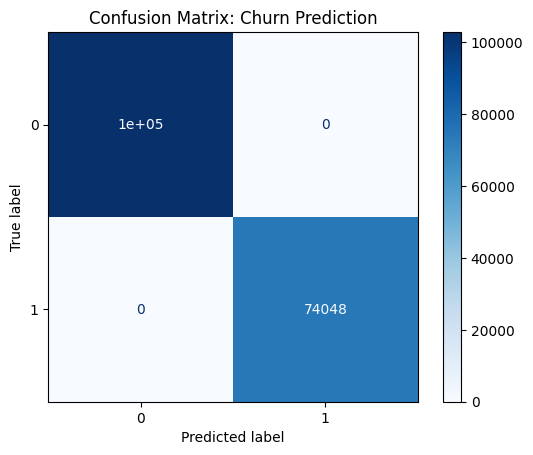

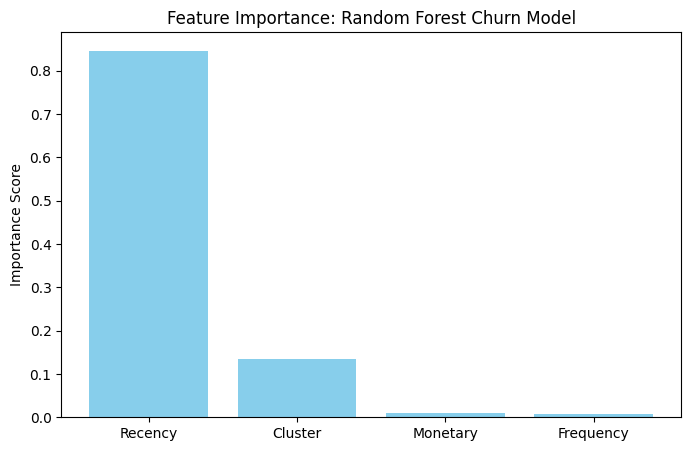

In [ ]:
# ---------------------------
# 📊 Confusion Matrix Plot
# ---------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot it
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Churn Prediction')
plt.show()

# ---------------------------
# 📊 Feature Importance Plot
# ---------------------------
import numpy as np

# Get feature importances from trained RF
importances = clf.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importance: Random Forest Churn Model")
plt.bar(range(X.shape[1]), importances[indices], color='skyblue', align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.ylabel('Importance Score')
plt.show()


/tmp/ipython-input-23-2151541998.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales = df.set_index('TransactionDate').resample('M')['TransactionAmount (INR)'].sum()


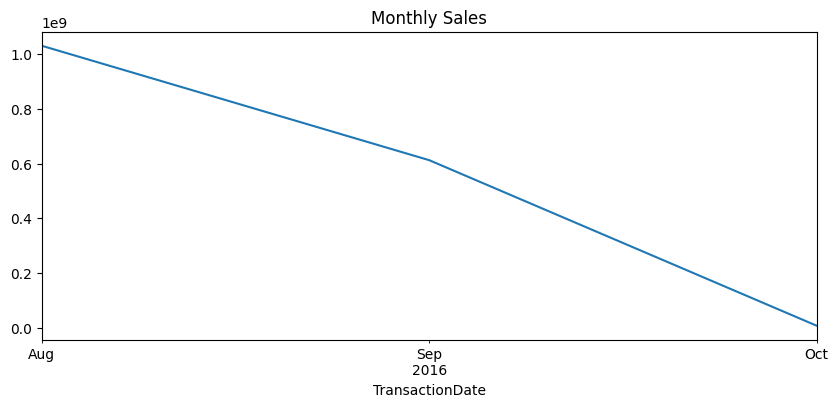

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


                                  SARIMAX Results                                  
Dep. Variable:     TransactionAmount (INR)   No. Observations:                    3
Model:                      ARIMA(2, 1, 2)   Log Likelihood                 -38.559
Date:                     Wed, 02 Jul 2025   AIC                             87.118
Time:                             08:48:21   BIC                             80.584
Sample:                         08-31-2016   HQIC                            73.453
                              - 10-31-2016                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6829   6697.446     -0.000      1.000   -1.31e+04    1.31e+04
ar.L2         -0.8504   1727.930     -0.000      1.000   -3387.531    3385.830
ma.L1      -

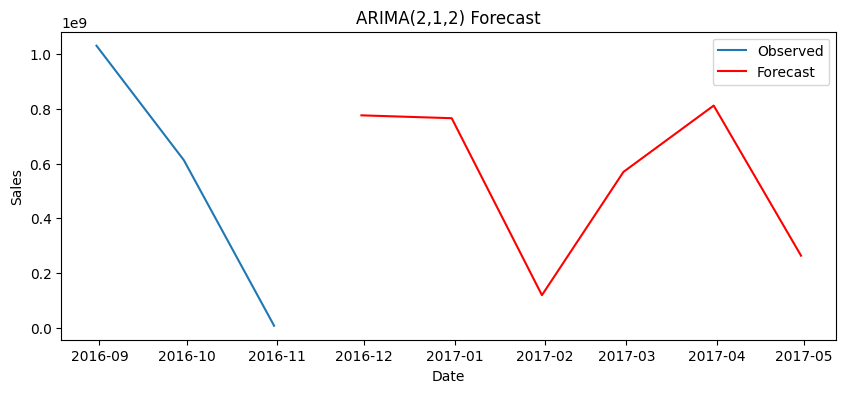

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Example: Suppose you have a monthly sales Series
# Replace this with your actual aggregated monthly sales
# E.g., df = your transactions grouped by month
# Here’s a tiny dummy:
# date_range = pd.date_range(start='2020-01', periods=36, freq='M')
# sales = pd.Series(np.random.randint(10000, 20000, size=36), index=date_range)

# If you have your own:
# sales = df['TransactionAmount'].resample('M').sum()

# Make sure your index is datetime!
sales = df.set_index('TransactionDate').resample('M')['TransactionAmount (INR)'].sum()

# Plot to check
sales.plot(title="Monthly Sales", figsize=(10,4))
plt.show()

# Fit ARIMA(2,1,2)
model = ARIMA(sales, order=(2, 1, 2))
model_fit = model.fit()

print(model_fit.summary())

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
print("\nForecasted values:")
print(forecast)

# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(sales, label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("ARIMA(2,1,2) Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
